In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


This has been done from a learning perspective.<br>
Notebooks from Kaggle that were used to learn and refer:
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

In [2]:
#importing the required libraries for...
#handling and visualizing the data...
#and creating Machine Learning Models...

import random as rd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
#importing the data

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
#checking the data and format first-hand
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking the data and format first-hand
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* Categorical Values: Survived, Sex, Embarked
* Ordinal Values: Pclass
* Continous: Age, Fare
* Discrete: SibSp, Parch
* Mixed(Alphanumeric+Numeric): Ticket, Cabin

In [6]:
#statistical description
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Only 38% of the people in the training set survived the tragic disaster.
* There are few missing values in the training dataset.
* The average age of travellers in the training set was 29.7 years with kids below 1 year also travelling as well as people as old as 80 years.
* Most of the travellers were not with their family and rather travelling alone in the training set.

In [7]:
#description of categorical or other attributes
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Morrow, Mr. Thomas Rowan",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


Apparently there are a lot of people with the same ticket!
HMM...Fishy

* Most of the travellers were male.
* People were sharing cabins with top occupancy of 4 in the training set.
* Most of the travellers embarked from S.

In [8]:
#finding the missing data
print(train.info())
print("*"*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

* Missing Values in Training Set(Present/Missing): Age(714/177), Cabin(204/687), Embarked(889/2)
* Missing Values in Test Set(Present/Missing): Age(332/86), Fare(417/1), Cabin(91/327)

Now we aim to anylyze the data even more. We will use grouping by and viusalization tools to our aid.

In [9]:
#checking if sex of the person helped(obviously it did, we all know that)

print("\tSex Count")
print(train['Sex'].value_counts())
print("*"*50)
print("  Survival based on Sex")
print(train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean())

	Sex Count
male      577
female    314
Name: Sex, dtype: int64
**************************************************
  Survival based on Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908


We see that indeed, on average if a passenger was a female, she had more chance of surviving than a male passenger.
* 74% of 314 women on the cruise survived, while only
* 18% of 577 men on the cruise survived

In [10]:
#checking if the class in which the passenger was travelling helped in any way for surviving
#well sometime money does help afterall...

print("\tClass Count")
print(train['Pclass'].value_counts())
print("*"*50)
print("  Survival based on Class")
print(train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean())

	Class Count
3    491
1    216
2    184
Name: Pclass, dtype: int64
**************************************************
  Survival based on Class
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


HMM...Interesting!<br>Different classes do have different survival chances.
* The people travelling in the first class had more chances at surviving the tragic event with ~63% surviving.
* People travelling in second class had a 47% survival rate.
* Third class had most number of passengers yet it had the least survival rate of 24%.

In [11]:
#let us also see the gender distribution in each class,
#that might give some insights as well

print("\tCount")
print(train.groupby(['Pclass', 'Sex']).count()['Survived'])
print("*"*50)
print("    Survival Rate")
print(train.groupby(['Pclass', 'Sex']).mean()['Survived'])

	Count
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64
**************************************************
    Survival Rate
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


Indeed the class and sex of a passenger mattered for survival!<br>We see an hierarchy here. The fancier or rich you are, you had a relatively high chance of surviving than people from lower classes in hierarchy. Additionally sex of the passenger is a crucial factor. In each class women were having more chances than men to survive.

In [12]:
#having family or siblings helped??

print(train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False))
print("*"*50)
print(train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False))

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
**************************************************
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [13]:
#count of people travelling alone

train.loc[(train['Parch']==0) & (train['SibSp']==0), 'Survived'].describe()['count']

537.0

People travelling with a small nuclear family had more chances at surviving.<br>
The less the people to look after, the easier it must had been to survive.<br>
Nonetheless most of the passengers were travelling alone.<br>
We need to create a feature that give us information of family more clearly.

Now let's do some visualizations!<br>
Ooh...FANCY

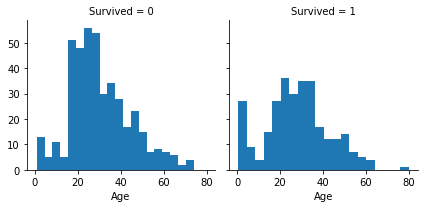

In [14]:
#plotting an histogram for Age
#might help to check if Age needs to/can be converted into categorical distribution

graph = sns.FacetGrid(train, col='Survived')
graph.map(plt.hist, 'Age', bins=20)

The younger passengers (below 4) were more likely to survive.<br>
The teenagers and working class people in the entirety were more likely to not survive.<br>
People with age 50 to 60 have relatively similar chances at dying and surviving.<br>
Passengers with age 60 to 70 were not able to sruvive.<br>
The oldest passenger(s) survived.

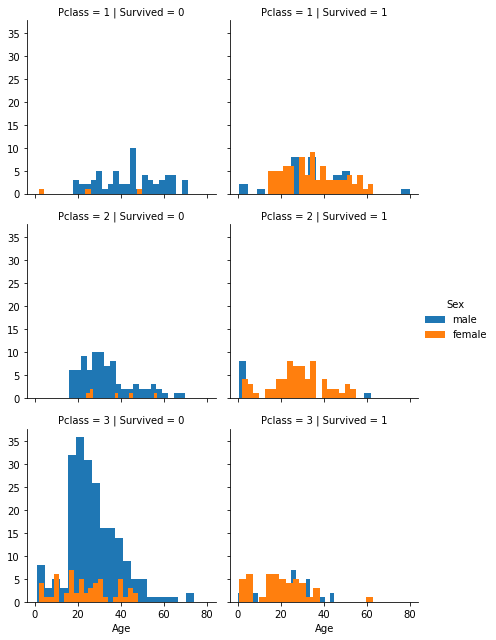

In [15]:
#plotting an histogram for Age but also considering the Class of passenger as well
#might help to check if Age needs to/can be converted into categorical distribution

graph = sns.FacetGrid(train, row='Pclass', col='Survived', hue='Sex')
graph.map(plt.hist, 'Age', bins=20)
graph.add_legend()

Apparently classes in social life do matter! DUH<br>
It is now clearly evident that more people in Class 1 survived rather than dying.<br>
Class 3 had the most number of passengers yet they were more likely to die.<br>
Irrespective of class a lot of infant population did survive.<br>
Class 2 passengers were equally likely to die or survive. But based on Sex mostly woman survived.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


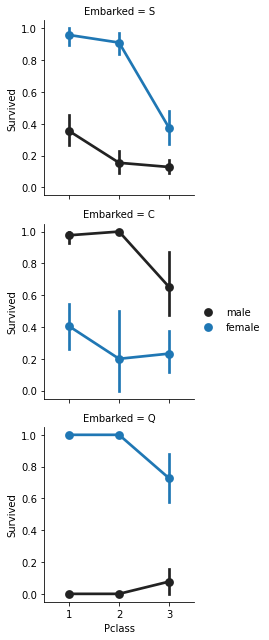

In [16]:
#let us check now if the boarding port had something to do with survival
#what we know is that the route was S->C->Q->crash

graph = sns.FacetGrid(train, row='Embarked')
graph.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
graph.add_legend()

Mostly female passengers survived.<br>
Class has already been established as a considerable factor in survival.<br>
Each port clearly has a certain trend for its passengers survival chances.<br>
An unlikely twist happened at port C where men were more likely to survive than women.<br>
At port Q men from Class 3 had better chances at surviving than Class 2 and Class 1. But hey did anyone passenger embarked from Port Q and was travelling in Class 2 or Class 1. Guess we will have to check!

In [17]:
#checking if there were passengers from Port Q and Pclass 1 or 2.

print(train.loc[(train['Embarked']=='Q') & ((train['Pclass']==1) | (train['Pclass']==2)), ['PassengerId', 'Survived', 'Pclass', 'Sex']])

     PassengerId  Survived  Pclass     Sex
245          246         0       1    male
303          304         1       2  female
322          323         1       2  female
412          413         1       1  female
626          627         0       2    male


Well...well! There were very few passengers to embark from Port Q and travel in Class 1 or Class 2.<br>
But only women survived and the men had a fatal night. So from the given data, yes, they had a 0% survival rate.


Now let's begin with creating and engineering with the features.

Firstly we will compute the missing data. There are few strategies to replace the missing data:
* Mean
* Median
* Mode
* KNN
<br><br>
Cabin has too many missing values. Generating values for it will also be difficult and might need intensive research. It's better that attribute is dropped.<br>
Embarked can be replaced with the Mode technique.<br>
Age can be replaced by KNN technique as people sharing similar features might have similar age. A fair guess!

In [18]:
#dropping Cabin and Ticket from both the datasets

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [19]:
#extracting Titles from the Names as they might be useful.
#Names otherwise provide nothing to our models.

for dataset in [train, test]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
#reducing the redundant titles generated because of langugage and country difference
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print(train[['Title', 'Survived']].groupby('Title', as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


HMM! Gender speaks...

In [21]:
#mapping the titles to numerical values

title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4}
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].map(title_map)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [22]:
#dropping the Name attribute

train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [23]:
#mapping the Sex to numerical values

sex_map = {'male':0, 'female':1}
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map(sex_map)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,0
1,2,1,1,1,38.0,1,0,71.2833,C,2
2,3,1,3,1,26.0,0,0,7.9250,S,1
3,4,1,1,1,35.0,1,0,53.1000,S,2
4,5,0,3,0,35.0,0,0,8.0500,S,0


In [24]:
#replacing missing Embarked ports using the mode technique

frequent = train.Embarked.mode()[0]
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].fillna(frequent)

In [25]:
#mapping Embarked attribue with numerical values

embarked_map = {'S':0, 'C':1, 'Q':2}
for dataset in [train, test]:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_map)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [26]:
#creating a Family attribute rather than Parch and SibSp

for dataset in [train, test]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,0,0,2
1,2,1,1,1,38.0,1,0,71.2833,1,2,2
2,3,1,3,1,26.0,0,0,7.9250,0,1,1
3,4,1,1,1,35.0,1,0,53.1000,0,2,2
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [27]:
#dropping SibSp and Parch from both the datasets

train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,7.2500,0,0,2
1,2,1,1,1,38.0,71.2833,1,2,2
2,3,1,3,1,26.0,7.9250,0,1,1
3,4,1,1,1,35.0,53.1000,0,2,2
4,5,0,3,0,35.0,8.0500,0,0,1


In [29]:
#imputing missing values for remaining numerical attributes

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(train.iloc[:, 2:])
train.iloc[:, 2:]=imputer.transform(train.iloc[:, 2:])
test.iloc[:, 1:]=imputer.transform(test.iloc[:, 1:])

In [30]:
#transforming Age into ordinal feature by creating bins/bands

for dataset in [train, test]:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3.0,0.0,1.0,7.2500,0.0,0.0,2.0
1,2,1,1.0,1.0,2.0,71.2833,1.0,2.0,2.0
2,3,1,3.0,1.0,1.0,7.9250,0.0,1.0,1.0
3,4,1,1.0,1.0,2.0,53.1000,0.0,2.0,2.0
4,5,0,3.0,0.0,2.0,8.0500,0.0,0.0,1.0


In [31]:
#identifying quantile bands for Fare

print(pd.qcut(train['Fare'], 4).unique())

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]


In [32]:
#transforming Fare into ordinal feature by creating bins/bands

for dataset in [train, test]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3.0,0.0,1.0,0.0,0.0,0.0,2.0
1,2,1,1.0,1.0,2.0,3.0,1.0,2.0,2.0
2,3,1,3.0,1.0,1.0,1.0,0.0,1.0,1.0
3,4,1,1.0,1.0,2.0,3.0,0.0,2.0,2.0
4,5,0,3.0,0.0,2.0,1.0,0.0,0.0,1.0


In [33]:
#dropping feature PassengerId from train dataset for its irrelevance
#and making the float back to integer 

train = train.drop(['PassengerId'], axis=1)
train = train.astype(int)
test = test.astype(int)

In [34]:
print(train.head())
print('*'*100)
print(test.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize
0         0       3    0    1     0         0      0           2
1         1       1    1    2     3         1      2           2
2         1       3    1    1     1         0      1           1
3         1       1    1    2     3         0      2           2
4         0       3    0    2     1         0      0           1
****************************************************************************************************
   PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize
0          892       3    0    2     0         2      0           1
1          893       3    1    2     0         0      2           2
2          894       2    0    3     1         2      0           1
3          895       3    0    1     1         0      0           1
4          896       3    1    1     1         0      2           3


Now we can begin with OneHotEncoding the categorical features.

In [35]:
#creating dummy variables for categorical features in training set
title_dummies = pd.get_dummies(train.Title, prefix="Title")
embarked_dummies = pd.get_dummies(train.Embarked, prefix="Embarked")

#concatenate dummy columns with main dataset
train = pd.concat([train, title_dummies.iloc[:, 1:], embarked_dummies.iloc[:, 1: ]], axis = 1)

#drop categorical features in training set
train.drop(['Embarked', 'Title'], axis = 1, inplace = True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Title_1,Title_2,Title_3,Title_4,Embarked_1,Embarked_2
0,0,3,0,1,0,2,0,0,0,0,0,0
1,1,1,1,2,3,2,0,1,0,0,1,0
2,1,3,1,1,1,1,1,0,0,0,0,0
3,1,1,1,2,3,2,0,1,0,0,0,0
4,0,3,0,2,1,1,0,0,0,0,0,0


In [37]:
#creating dummy variables for categorical features in test set
title_dummies = pd.get_dummies(test.Title, prefix="Title")
embarked_dummies = pd.get_dummies(test.Embarked, prefix="Embarked")

#concatenate dummy columns with main dataset
test = pd.concat([test, title_dummies.iloc[:, 1:], embarked_dummies.iloc[:, 1:]], axis = 1)

#drop categorical features in training set
test.drop(['Embarked', 'Title'], axis = 1, inplace = True)

In [38]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,FamilySize,Title_1,Title_2,Title_3,Title_4,Embarked_1,Embarked_2
0,892,3,0,2,0,1,0,0,0,0,0,1
1,893,3,1,2,0,2,0,1,0,0,0,0
2,894,2,0,3,1,1,0,0,0,0,0,1
3,895,3,0,1,1,1,0,0,0,0,0,0
4,896,3,1,1,1,3,0,1,0,0,0,0


In [39]:
#to check if their is imbalance in data for dependent variable

train.groupby('Survived').count()

,Pclass,Sex,Age,Fare,FamilySize,Title_1,Title_2,Title_3,Title_4,Embarked_1,Embarked_2
Survived,,,,,,,,,,,
0,549,549,549,549,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342,342,342,342,342


Let us now begin with the interesting part of splitting the data and creating ML models!!!

In [40]:
#getting the data into np array format

X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values
X_test = test.values

In [41]:
#creating a training set and validation set

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state=0, stratify=y)

In [42]:
#defining helper functions

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
def trainer(model, X, y, test):
    model.fit(X, y)
    return model.predict(test), cross_val_score(estimator=model, X=X, y=y, cv=10)

def report_generator(name, pred):
    print("Model: "+name)
    print(classification_report(y_val, pred))
    print("*"*50)

In [43]:
#Base Models
#Logistic Regression
log_res = LogisticRegression(random_state=0)
log_res_pred, log_res_cv = trainer(log_res, X_train, y_train, X_val)

#Perceptron
ptron = Perceptron(random_state=0)
ptron_pred, ptron_cv = trainer(ptron, X_train, y_train, X_val)

#Stochastic Gradient Descent
sgd = SGDClassifier(random_state=0)
sgd_pred, sgd_cv = trainer(sgd, X_train, y_train, X_val)

#Support Vector Classifier
svc = SVC(random_state=0)
svc_pred, svc_cv = trainer(svc, X_train, y_train, X_val)

#Linear Support Vector Classifier
svc_lin = LinearSVC(random_state=0)
svc_lin_pred, svc_lin_cv = trainer(svc_lin, X_train, y_train, X_val)

#Decision Trees
dt = DecisionTreeClassifier(random_state=0)
dt_pred, dt_cv = trainer(dt, X_train, y_train, X_val)

#Random Forest
rf = RandomForestClassifier(random_state=0, n_estimators=50)
rf_pred, rf_cv = trainer(rf, X_train, y_train, X_val)

#AdaBoost
ada = AdaBoostClassifier(random_state=0, n_estimators=50)
ada_pred, ada_cv = trainer(ada, X_train, y_train, X_val)

#GradientBoost
gb = GradientBoostingClassifier(random_state=0, n_estimators=50)
gb_pred, gb_cv = trainer(gb, X_train, y_train, X_val)

#Extra Trees
et = ExtraTreesClassifier(random_state=0, n_estimators=50)
et_pred, et_cv = trainer(et, X_train, y_train, X_val)

#ExtraGradientBoost
xgb = XGBClassifier()
xgb_pred, xgb_cv = trainer(xgb, X_train, y_train, X_val)

#KNearestNeighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn_pred, knn_cv = trainer(knn, X_train, y_train, X_val)

#Gaussian Naive Bayes
gnb = GaussianNB()
gnb_pred, gnb_cv = trainer(gnb, X_train, y_train, X_val)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [44]:
#generating a data frame that shall hold the basic cross val score
cross_val_model_scores = pd.DataFrame({"Model":["Logistic Regression", "Perceptron", "Stochastic Gradient Descent Classifier",
                                               "Support Vector Classifier", "Linear Support Vector Classifer", "Decision Tree Classifier",
                                               "Random Forest Classifer", "AdaBoost Classifer", "GradientBoost Classifer", "Extra Trees Classifer",
                                               "ExtraGradientBoost Classifer", "KNearestNeighbors", "Gaussian Naive Bayes"],
                                      "Cross_Val_Score":[log_res_cv.mean(), ptron_cv.mean(), sgd_cv.mean(),
                                                         svc_cv.mean(), svc_lin_cv.mean(), dt_cv.mean(),
                                                         rf_cv.mean(), ada_cv.mean(), gb_cv.mean(), et_cv.mean(),
                                                         xgb_cv.mean(), knn_cv.mean(), gnb_cv.mean()],
                                      "Standard Deviation":[log_res_cv.std(), ptron_cv.std(), sgd_cv.std(), svc_cv.std(),
                                                            svc_lin_cv.std(), dt_cv.std(), rf_cv.std(), ada_cv.std(),
                                                            gb_cv.std(), et_cv.std(), xgb_cv.std(), knn_cv.std(),
                                                            gnb_cv.std()]})
cross_val_model_scores

,Model,Cross_Val_Score,Standard Deviation
0,Logistic Regression,0.829285,0.027239
1,Perceptron,0.759046,0.092213
2,Stochastic Gradient Descent Classifier,0.793397,0.040975
3,Support Vector Classifier,0.800791,0.037245
4,Linear Support Vector Classifer,0.832316,0.027470
5,Decision Tree Classifier,0.814224,0.042619
6,Random Forest Classifer,0.809815,0.056208
7,AdaBoost Classifer,0.814315,0.028857
8,GradientBoost Classifer,0.824808,0.027173
9,Extra Trees Classifer,0.808322,0.046469


In [45]:
#generating report to get insights into how well training has been done

#Logistic Regression
report_generator("Logistic Regression", log_res_pred)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       137
           1       0.81      0.65      0.72        86

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223

**************************************************


In [46]:
#Perceptron
report_generator("Perceptron", ptron_pred)

Model: Perceptron
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       137
           1       0.56      0.56      0.56        86

    accuracy                           0.66       223
   macro avg       0.64      0.64      0.64       223
weighted avg       0.66      0.66      0.66       223

**************************************************


In [47]:
#Stochastic Gradient Descent Classifier
report_generator("Stochastic Gradient Descent Classifer", sgd_pred)

Model: Stochastic Gradient Descent Classifer
              precision    recall  f1-score   support

           0       0.84      0.53      0.65       137
           1       0.53      0.84      0.65        86

    accuracy                           0.65       223
   macro avg       0.68      0.69      0.65       223
weighted avg       0.72      0.65      0.65       223

**************************************************


In [48]:
#Support Vector Classifier
report_generator("Support Vector Classifier", svc_pred)

Model: Support Vector Classifier
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       137
           1       0.77      0.65      0.70        86

    accuracy                           0.79       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.79      0.79      0.79       223

**************************************************


In [49]:
#Linear Support Vector Classifer
report_generator("Linear Support Vector Classifier", svc_lin_pred)

Model: Linear Support Vector Classifier
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       137
           1       0.81      0.67      0.73        86

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223

**************************************************


In [50]:
#Decision Tree Classifier
report_generator("Decision Tree Classifier", dt_pred)

Model: Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       137
           1       0.82      0.63      0.71        86

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223

**************************************************


In [51]:
#Random Forest Classifier
report_generator("Random Forest Classifier", rf_pred)

Model: Random Forest Classifier
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       137
           1       0.82      0.63      0.71        86

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223

**************************************************


In [52]:
#AdaBoost Classifer
report_generator("AdaBoost Classifier", ada_pred)

Model: AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
           1       0.77      0.70      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

**************************************************


In [53]:
#GradientBoost Classifier
report_generator("GradientBoostClassifier", gb_pred)

Model: GradientBoostClassifier
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       137
           1       0.91      0.62      0.74        86

    accuracy                           0.83       223
   macro avg       0.86      0.79      0.81       223
weighted avg       0.84      0.83      0.82       223

**************************************************


In [54]:
#Extra Trees Classifier
report_generator("Extra Trees Classifier", et_pred)

Model: Extra Trees Classifier
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       137
           1       0.83      0.62      0.71        86

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.81      0.80      0.80       223

**************************************************


In [55]:
#ExtraGradientBoost Classifier
report_generator("ExtraGradientBoost Classifer", xgb_pred)

Model: ExtraGradientBoost Classifer
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       137
           1       0.83      0.62      0.71        86

    accuracy                           0.80       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.81      0.80      0.80       223

**************************************************


In [56]:
#KNearestNeighbors
report_generator("KNearestNeighbors", knn_pred)

Model: KNearestNeighbors
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       137
           1       0.79      0.66      0.72        86

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223

**************************************************


In [57]:
#Gaussian Naive Bayes
report_generator("Gaussian Naive Bayes", gnb_pred)

Model: Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       137
           1       0.70      0.72      0.71        86

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.78      0.78       223

**************************************************


**Hyper-Parameters Tuning**<br>
Based on above accuracy results, will perform Grid Search for GradientBoost Classifier

In [58]:
#final data to train the model on

X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1)

In [59]:
#kfolds for grid search

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [ ]:
#Gradient Boost Tuning

from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }
modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
modelf.fit(X_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   29.0s


In [ ]:
# Best score

modelf.best_score_

In [ ]:
# Best Estimator

modelf.best_estimator_

In [ ]:
#Final Training and Predicting results

grad_boost_classifier = GradientBoostingClassifier(n_estimators = 400, max_features = 0.3, min_samples_leaf = 100, max_depth = 4)
grad_boost_classifier.fit(X_train, y_train)
y_pred = grad_boost_classifier.predict(X_test)
acc_grad_boost = round(grad_boost_classifier.score(X_train, y_train) * 100, 2)
acc_grad_boost

In [ ]:
#submission file

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred})
submission.head()

In [ ]:
submission.to_csv("Titanic_Submission.csv", index = False)